<a href="https://colab.research.google.com/github/nestorsgarzonc/unal_stochastics/blob/main/Simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np

# Definimos los parámetros iniciales dados
# Probabilidad de elegir la Bolsa 1
theta_0 = 0.6 # @param {type: "slider", min: 0, max: 1, step: 0.1}
# Probabilidades para la Bolsa 1
theta_H1_0 = 0.6 # @param {type: "slider", min: 0, max: 1, step: 0.1}
theta_F1_0 = theta_W1_0 = theta_H1_0
# Probabilidades para la Bolsa 2
theta_H2_0 = 0.4  # @param {type: "slider", min: 0, max: 1, step: 0.1}
theta_F2_0 = theta_W2_0 = theta_H2_0

# Para la simulación, necesitamos asumir algunos datos observados.
# Generaremos datos observados aleatorios para ilustrar cómo funciona el EM.
# En la práctica, utilizaríamos los datos reales proporcionados en el problema.

# Generamos un conjunto de datos ficticio con 10 observaciones y 3 atributos (Sabor, Envoltorio, Agujero)
seed = 42 # @param {type:"number"}
np.random.seed(seed) # Semilla para la reproducibilidad
simulated_data = np.random.choice([0, 1], size=(10, 3))  # Datos aleatorios

# E-step: Calculamos las responsabilidades basadas en los parámetros actuales
responsibilities = np.zeros((simulated_data.shape[0], 2))  # Matriz de responsabilidades para 2 bolsas

for i, observation in enumerate(simulated_data):
    # Probabilidad de que la observación venga de la Bolsa 1
    p_bag1 = theta_0 * np.prod([theta_F1_0 if flavor else 1 - theta_F1_0 for flavor in observation])

    # Probabilidad de que la observación venga de la Bolsa 2
    p_bag2 = (1 - theta_0) * np.prod([theta_F2_0 if flavor else 1 - theta_F2_0 for flavor in observation])

    # Normalizamos para obtener responsabilidades
    total_p = p_bag1 + p_bag2
    responsibilities[i, 0] = p_bag1 / total_p
    responsibilities[i, 1] = p_bag2 / total_p

# M-step: Actualizamos los parámetros basados en las responsabilidades calculadas
theta_1 = np.mean(responsibilities[:, 0])

# Actualizamos las probabilidades para cada atributo y bolsa
theta_F1_1 = np.dot(responsibilities[:, 0], simulated_data[:, 0]) / np.sum(responsibilities[:, 0])
theta_W1_1 = np.dot(responsibilities[:, 0], simulated_data[:, 1]) / np.sum(responsibilities[:, 0])
theta_H1_1 = np.dot(responsibilities[:, 0], simulated_data[:, 2]) / np.sum(responsibilities[:, 0])

theta_F2_1 = np.dot(responsibilities[:, 1], simulated_data[:, 0]) / np.sum(responsibilities[:, 1])
theta_W2_1 = np.dot(responsibilities[:, 1], simulated_data[:, 1]) / np.sum(responsibilities[:, 1])
theta_H2_1 = np.dot(responsibilities[:, 1], simulated_data[:, 2]) / np.sum(responsibilities[:, 1])

# Los parámetros actualizados después de la primera iteración del EM
(theta_1, theta_F1_1, theta_W1_1, theta_H1_1, theta_F2_1, theta_W2_1, theta_H2_1)


(0.6054718477398889,
 0.47275703994760965,
 0.5870988867059593,
 0.7840209561231171,
 0.2883417085427137,
 0.3663316582914574,
 0.5710552763819097)

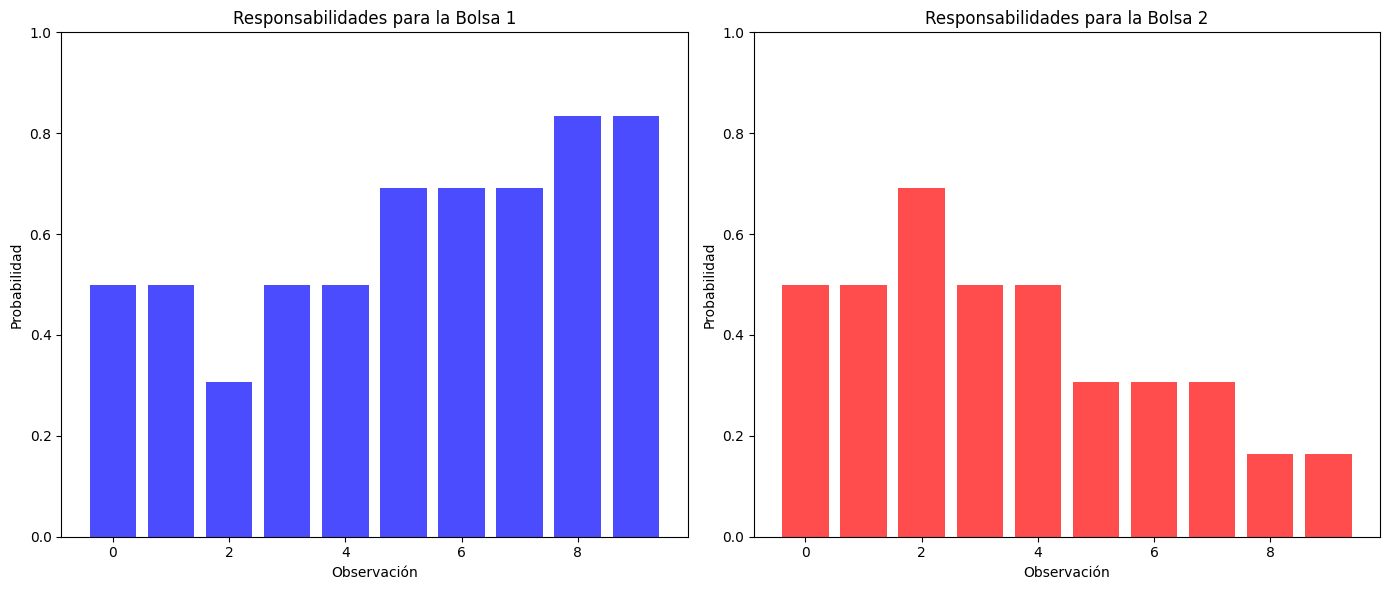

In [14]:
import matplotlib.pyplot as plt

# Visualizamos las responsabilidades de cada observación
plt.figure(figsize=(14, 6))

# Responsabilidades para la Bolsa 1
plt.subplot(1, 2, 1)
plt.bar(range(simulated_data.shape[0]), responsibilities[:, 0], color='blue', alpha=0.7)
plt.title('Responsabilidades para la Bolsa 1')
plt.xlabel('Observación')
plt.ylabel('Probabilidad')
plt.ylim(0, 1)

# Responsabilidades para la Bolsa 2
plt.subplot(1, 2, 2)
plt.bar(range(simulated_data.shape[0]), responsibilities[:, 1], color='red', alpha=0.7)
plt.title('Responsabilidades para la Bolsa 2')
plt.xlabel('Observación')
plt.ylabel('Probabilidad')
plt.ylim(0, 1)

# Mostramos el gráfico
plt.tight_layout()
plt.show()


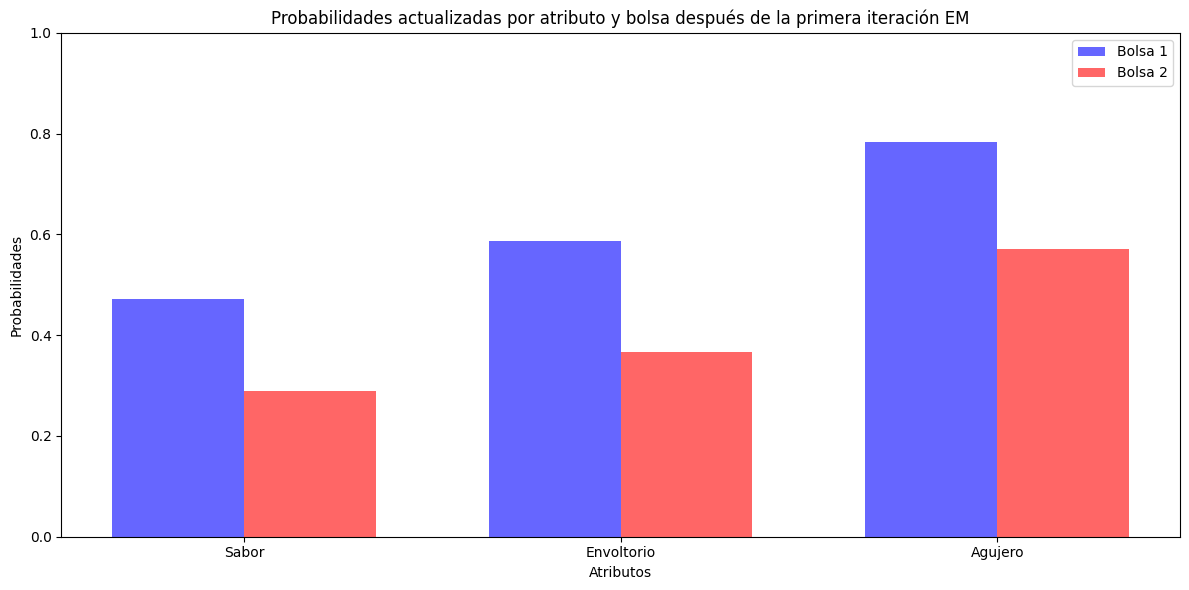

In [12]:
import matplotlib.pyplot as plt


# Creamos un gráfico de barras para las probabilidades actualizadas de los atributos para cada bolsa

# Definimos los nombres de los atributos y los valores actualizados de las probabilidades
attributes = ['Sabor', 'Envoltorio', 'Agujero']
probabilities_bag1 = [theta_F1_1, theta_W1_1, theta_H1_1]
probabilities_bag2 = [theta_F2_1, theta_W2_1, theta_H2_1]

# Graficamos las probabilidades para la Bolsa 1
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(attributes))

bar1 = plt.bar(index, probabilities_bag1, bar_width, label='Bolsa 1', color='b', alpha=0.6)

# Graficamos las probabilidades para la Bolsa 2
bar2 = plt.bar(index + bar_width, probabilities_bag2, bar_width, label='Bolsa 2', color='r', alpha=0.6)

plt.xlabel('Atributos')
plt.ylabel('Probabilidades')
plt.title('Probabilidades actualizadas por atributo y bolsa después de la primera iteración EM')
plt.xticks(index + bar_width / 2, attributes)
plt.ylim(0, 1)
plt.legend()

# Mostramos el gráfico
plt.tight_layout()
plt.show()


In [ ]:
# DRAW

In [7]:
# Parámetros iniciales
theta = 0.6  # Probabilidad de elegir la Bolsa 1
theta_F1 = theta_W1 = theta_H1 = 0.6  # Probabilidades para la Bolsa 1
theta_F2 = theta_W2 = theta_H2 = 0.4  # Probabilidades para la Bolsa 2

# Función para calcular la probabilidad de la observación dado los parámetros de la bolsa
def calculate_observation_probability(obs, theta_F, theta_W, theta_H):
    # Cada atributo contribuye a la probabilidad total; asumimos independencia entre atributos
    prob = (theta_F if obs[0] == 1 else (1 - theta_F)) * \
           (theta_W if obs[1] == 1 else (1 - theta_W)) * \
           (theta_H if obs[2] == 1 else (1 - theta_H))
    return prob

# Simulamos 5 observaciones (esto es solo un ejemplo, en la práctica usaríamos datos reales)
simulated_observations = np.array([
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 0],
    [0, 0, 1],
    [1, 1, 1]
])

# E-step: Calculamos las responsabilidades para cada observación
responsibilities = np.zeros((simulated_observations.shape[0], 2))  # Para dos bolsas

for i, obs in enumerate(simulated_observations):
    # Calculamos la probabilidad de la observación para cada bolsa
    prob_bag1 = calculate_observation_probability(obs, theta_F1, theta_W1, theta_H1)
    prob_bag2 = calculate_observation_probability(obs, theta_F2, theta_W2, theta_H2)

    # Ponderamos por la probabilidad de seleccionar cada bolsa
    weighted_prob_bag1 = theta * prob_bag1
    weighted_prob_bag2 = (1 - theta) * prob_bag2

    # Responsabilidades normalizadas (probabilidades de que la observación provenga de cada bolsa)
    total_prob = weighted_prob_bag1 + weighted_prob_bag2
    responsibilities[i, 0] = weighted_prob_bag1 / total_prob  # Bolsa 1
    responsibilities[i, 1] = weighted_prob_bag2 / total_prob  # Bolsa 2

responsibilities  # Mostrar las responsabilidades calculadas


array([[0.69230769, 0.30769231],
       [0.69230769, 0.30769231],
       [0.69230769, 0.30769231],
       [0.5       , 0.5       ],
       [0.83505155, 0.16494845]])

In [8]:
# Parámetros iniciales iguales para todos
theta_equal = 0.5
theta_F1_equal = theta_W1_equal = theta_H1_equal = 0.5
theta_F2_equal = theta_W2_equal = theta_H2_equal = 0.5

# E-step con parámetros iguales
responsibilities_equal = np.zeros((simulated_observations.shape[0], 2))  # Para dos bolsas

for i, obs in enumerate(simulated_observations):
    # Calculamos la probabilidad de la observación para cada bolsa con parámetros iguales
    prob_bag1_equal = calculate_observation_probability(obs, theta_F1_equal, theta_W1_equal, theta_H1_equal)
    prob_bag2_equal = calculate_observation_probability(obs, theta_F2_equal, theta_W2_equal, theta_H2_equal)

    # Ponderamos por la probabilidad de seleccionar cada bolsa con parámetros iguales
    weighted_prob_bag1_equal = theta_equal * prob_bag1_equal
    weighted_prob_bag2_equal = (1 - theta_equal) * prob_bag2_equal

    # Responsabilidades normalizadas
    total_prob_equal = weighted_prob_bag1_equal + weighted_prob_bag2_equal
    responsibilities_equal[i, 0] = weighted_prob_bag1_equal / total_prob_equal  # Bolsa 1
    responsibilities_equal[i, 1] = weighted_prob_bag2_equal / total_prob_equal  # Bolsa 2

# M-step con parámetros iguales
theta_updated_equal = np.mean(responsibilities_equal[:, 0])

# Actualizamos las probabilidades para cada atributo y bolsa con parámetros iguales
theta_F1_updated_equal = np.sum(responsibilities_equal[:, 0] * simulated_observations[:, 0]) / np.sum(responsibilities_equal[:, 0])
theta_W1_updated_equal = np.sum(responsibilities_equal[:, 0] * simulated_observations[:, 1]) / np.sum(responsibilities_equal[:, 0])
theta_H1_updated_equal = np.sum(responsibilities_equal[:, 0] * simulated_observations[:, 2]) / np.sum(responsibilities_equal[:, 0])

theta_F2_updated_equal = np.sum(responsibilities_equal[:, 1] * simulated_observations[:, 0]) / np.sum(responsibilities_equal[:, 1])
theta_W2_updated_equal = np.sum(responsibilities_equal[:, 1] * simulated_observations[:, 1]) / np.sum(responsibilities_equal[:, 1])
theta_H2_updated_equal = np.sum(responsibilities_equal[:, 1] * simulated_observations[:, 2]) / np.sum(responsibilities_equal[:, 1])

(responsibilities_equal,
 (theta_updated_equal, theta_F1_updated_equal, theta_W1_updated_equal, theta_H1_updated_equal,
  theta_F2_updated_equal, theta_W2_updated_equal, theta_H2_updated_equal))


(array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]),
 (0.5, 0.6, 0.6, 0.8, 0.6, 0.6, 0.8))